In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD 
import numpy as np 
import random
import matplotlib.pyplot as plt

In [3]:
import os
os.environ['CUDA _VISIBLE DEVICES'] ='-1'

In [4]:
x_train = np.loadtxt('input.csv',delimiter =',')
y_train = np.loadtxt ('labels.csv',delimiter =',') 

In [5]:
x_test = np.loadtxt('input_test.csv', delimiter =',')
y_test = np.loadtxt('labels_test.csv', delimiter =',')

In [6]:
x_train = x_train.reshape (len (x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1) 

In [7]:
x_test = x_test . reshape(len(x_test),100, 100,3)
y_test = y_test. reshape (len(y_test), 1)

In [8]:
x_train = x_train/255.0
x_test=x_test/255.0 

In [9]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape) 

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (400, 100, 100, 3)
Shape of X_train: (400, 1)


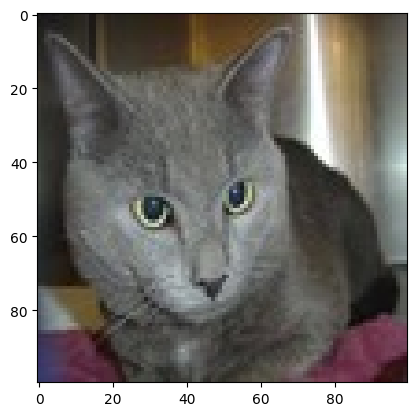

In [22]:
idx = random.randint(0, len(x_train)) 
plt.imshow(x_train[idx, :]) 
plt.show() 

In [11]:
from tensorflow.keras.layers import BatchNormalization

In [12]:
model = Sequential([
        Conv2D(256, (3,3) , activation = 'relu', input_shape=(100, 100, 3)), 
        BatchNormalization(),
        MaxPooling2D((4, 4)), Conv2D(128, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid') 
    ])

In [13]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy']) 

In [14]:
model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
63/63 [==============================] - 104s 2s/step - loss: 0.8004 - accuracy: 0.5610 - val_loss: 0.7900 - val_accuracy: 0.4925
Epoch 2/10
63/63 [==============================] - 97s 2s/step - loss: 0.6429 - accuracy: 0.6355 - val_loss: 0.8175 - val_accuracy: 0.4950
Epoch 3/10
63/63 [==============================] - 107s 2s/step - loss: 0.6084 - accuracy: 0.6780 - val_loss: 1.0085 - val_accuracy: 0.4975
Epoch 4/10
63/63 [==============================] - 100s 2s/step - loss: 0.5957 - accuracy: 0.6790 - val_loss: 0.8467 - val_accuracy: 0.5550
Epoch 5/10
63/63 [==============================] - 98s 2s/step - loss: 0.5492 - accuracy: 0.7240 - val_loss: 0.7449 - val_accuracy: 0.5900
Epoch 6/10
63/63 [==============================] - 94s 1s/step - loss: 0.5264 - accuracy: 0.7340 - val_loss: 0.6581 - val_accuracy: 0.6350
Epoch 7/10
63/63 [==============================] - 97s 2s/step - loss: 0.4688 - accuracy: 0.7775 - val_loss: 0.6600 - val_accuracy: 0.6850
Epoch 8/10
63/63 

In [15]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 5s 365ms/step - loss: 0.9758 - accuracy: 0.6300


[0.9757642149925232, 0.6299999952316284]

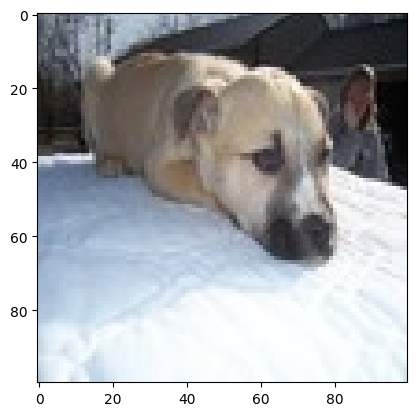

In [24]:
idx2 = random.randint(0, len(y_test)) 
plt.imshow(x_test [idx2, :]) 
plt.show()


In [25]:
y_pred=model.predict(x_test[idx2,:].reshape(1, 100,100, 3)) 
y_pred = y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a",pred) 

1/1 [==============================] - 0s 27ms/step
Our model says it is a dog


In [18]:
score=model.evaluate(x_test, y_test, verbose=0)
print ("Test Score: ", score[0]) 
print("Test accuracy: ", score[1]) 

Test Score:  0.9757642149925232
Test accuracy:  0.6299999952316284


In [19]:
model.summary () 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                        

In [20]:
val = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
63/63 [==============================] - 113s 2s/step - loss: 0.3176 - accuracy: 0.8590 - val_loss: 0.9273 - val_accuracy: 0.6650
Epoch 2/5
63/63 [==============================] - 109s 2s/step - loss: 0.2928 - accuracy: 0.8770 - val_loss: 0.6999 - val_accuracy: 0.6600
Epoch 3/5
63/63 [==============================] - 102s 2s/step - loss: 0.2552 - accuracy: 0.8890 - val_loss: 1.2390 - val_accuracy: 0.6475
Epoch 4/5
63/63 [==============================] - 105s 2s/step - loss: 0.2176 - accuracy: 0.9150 - val_loss: 0.9080 - val_accuracy: 0.6725
Epoch 5/5
63/63 [==============================] - 90s 1s/step - loss: 0.2025 - accuracy: 0.9140 - val_loss: 0.8946 - val_accuracy: 0.7300


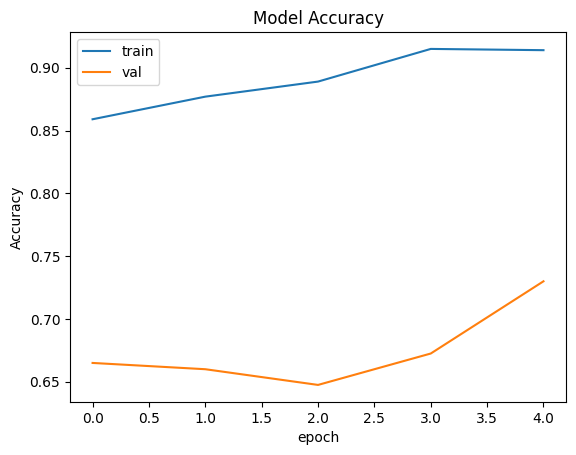

In [21]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch') 
plt.plot(val.history['accuracy']) 
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()